# Project 08: Regression Analysis

This notebook demonstrates various regression techniques to model polynomial data. We'll compare different algorithms:
1. Linear Regression
2. K-Nearest Neighbors Regression
3. Polynomial Regression

We'll evaluate models using train and test MSE (Mean Squared Error) to identify which approach best captures the underlying polynomial patterns in our data.

## 1. Setup and Data Generation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import pickle

# Set random seed for reproducibility
np.random.seed(42)

# Set up plot style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

Generated 300 data points with polynomial pattern:
y = 1x⁴ + 2x³ + 1x² + (-4)x + 2 + noise


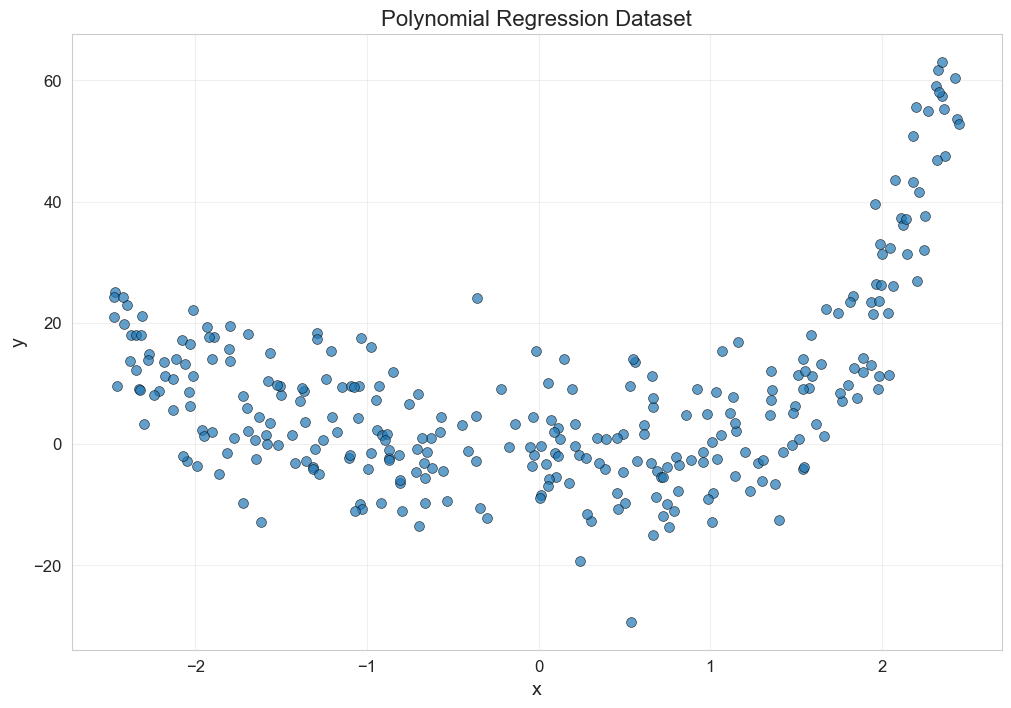

In [ ]:
def generate_polynomial_data(size=300, noise_level=8):
   
    # Generate input features
    X = np.random.rand(size)*5-2.5  # Range from -2.5 to 2.5
    
    # Define polynomial coefficients
    w4, w3, w2, w1, w0 = 1, 2, 1, -4, 2
    
    # Generate target values with noise
    y = w4*(X**4) + w3*(X**3) + w2*(X**2) + w1*X + w0 + np.random.randn(size)*noise_level-noise_level/2
    
    # Create DataFrame
    df = pd.DataFrame({'x': X, 'y': y})
    
    print(f"Generated {size} data points with polynomial pattern:")
    print(f"y = {w4}x⁴ + {w3}x³ + {w2}x² + ({w1})x + {w0} + noise")
    
    return df

# Generate data
df = generate_polynomial_data(size=300, noise_level=8)

# Save to CSV for reference
df.to_csv('data/polynomial_regression_data.csv', index=None)

# Visualize the data
plt.figure(figsize=(12, 8))
plt.scatter(df['x'], df['y'], alpha=0.7, s=50, c='#1f77b4', edgecolors='k', linewidths=0.5)
plt.title('Polynomial Regression Dataset', fontsize=16)
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()

## 2. Data Preparation

In [3]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df[['x']], df['y'], 
    train_size=0.8, 
    test_size=0.2, 
    random_state=42
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")

# Lists to store model performance metrics
train_mse = []
test_mse = []
regressors = []

# Visualization settings
x_plot = np.linspace(-2.7, 2.7, 1000).reshape(-1, 1)

Training set: 240 samples
Testing set: 60 samples


## 3. Linear Regression

First, let's try a simple linear regression model. We expect this to perform poorly since our data follows a polynomial pattern.

Linear Regression Model:
  Intercept: 8.8741
  Coefficient: 3.5848
  Equation: y = 3.5848x + 8.8741

Model Performance:
  Training MSE: 240.60
  Test MSE: 148.43


c:\Users\kniko\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


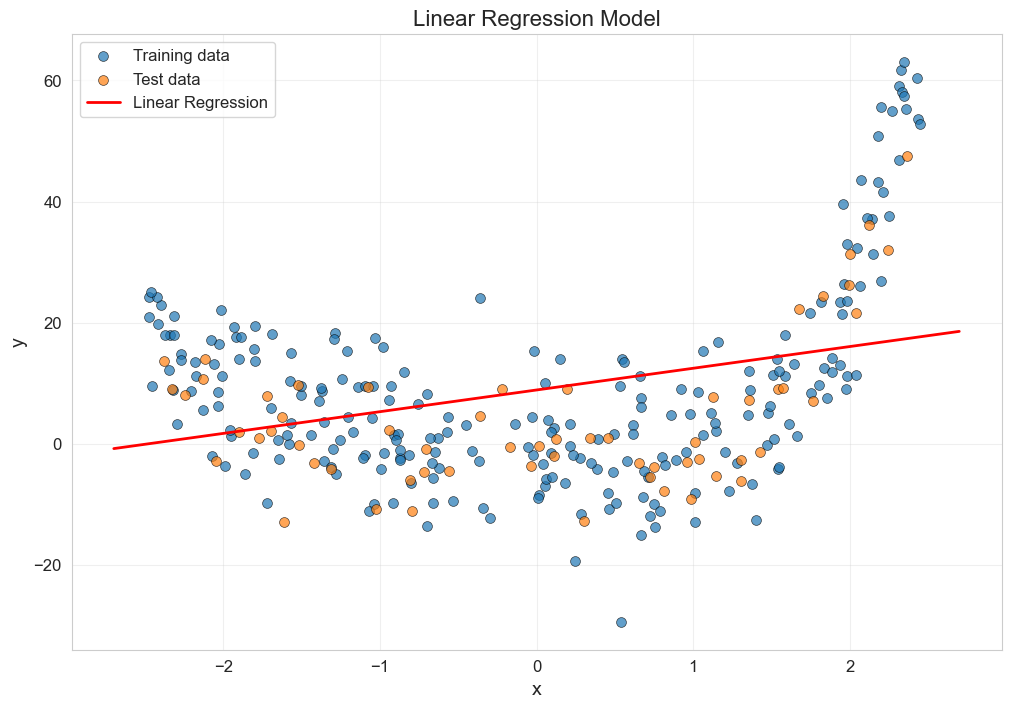

In [4]:
# Train a linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Print model coefficients
print(f"Linear Regression Model:")
print(f"  Intercept: {lin_reg.intercept_:.4f}")
print(f"  Coefficient: {lin_reg.coef_[0]:.4f}")
print(f"  Equation: y = {lin_reg.coef_[0]:.4f}x + {lin_reg.intercept_:.4f}")

# Calculate MSE on training and test sets
y_train_pred = lin_reg.predict(X_train)
y_test_pred = lin_reg.predict(X_test)

train_mse.append(mean_squared_error(y_train, y_train_pred))
test_mse.append(mean_squared_error(y_test, y_test_pred))
regressors.append((lin_reg, None))

print(f"\nModel Performance:")
print(f"  Training MSE: {train_mse[0]:.2f}")
print(f"  Test MSE: {test_mse[0]:.2f}")

# Visualize the model
plt.figure(figsize=(12, 8))

# Plot training data
plt.scatter(X_train, y_train, alpha=0.7, s=50, c='#1f77b4', edgecolors='k', 
           linewidths=0.5, label='Training data')

# Plot test data
plt.scatter(X_test, y_test, alpha=0.7, s=50, c='#ff7f0e', edgecolors='k', 
           linewidths=0.5, label='Test data')

# Plot prediction line
y_plot = lin_reg.predict(x_plot)
plt.plot(x_plot, y_plot, color='red', linewidth=2, label='Linear Regression')

plt.title('Linear Regression Model', fontsize=16)
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)
plt.show()

## 4. K-Nearest Neighbors Regression

Next, let's try KNN regression with different values of k (number of neighbors).

c:\Users\kniko\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
c:\Users\kniko\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
c:\Users\kniko\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
c:\Users\kniko\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


KNN Regressor with k=3:
  Training MSE: 48.80
  Test MSE: 60.41

KNN Regressor with k=5:
  Training MSE: 55.73
  Test MSE: 53.82

KNN Regressor with k=7:
  Training MSE: 59.77
  Test MSE: 46.52

KNN Regressor with k=15:
  Training MSE: 64.16
  Test MSE: 47.76



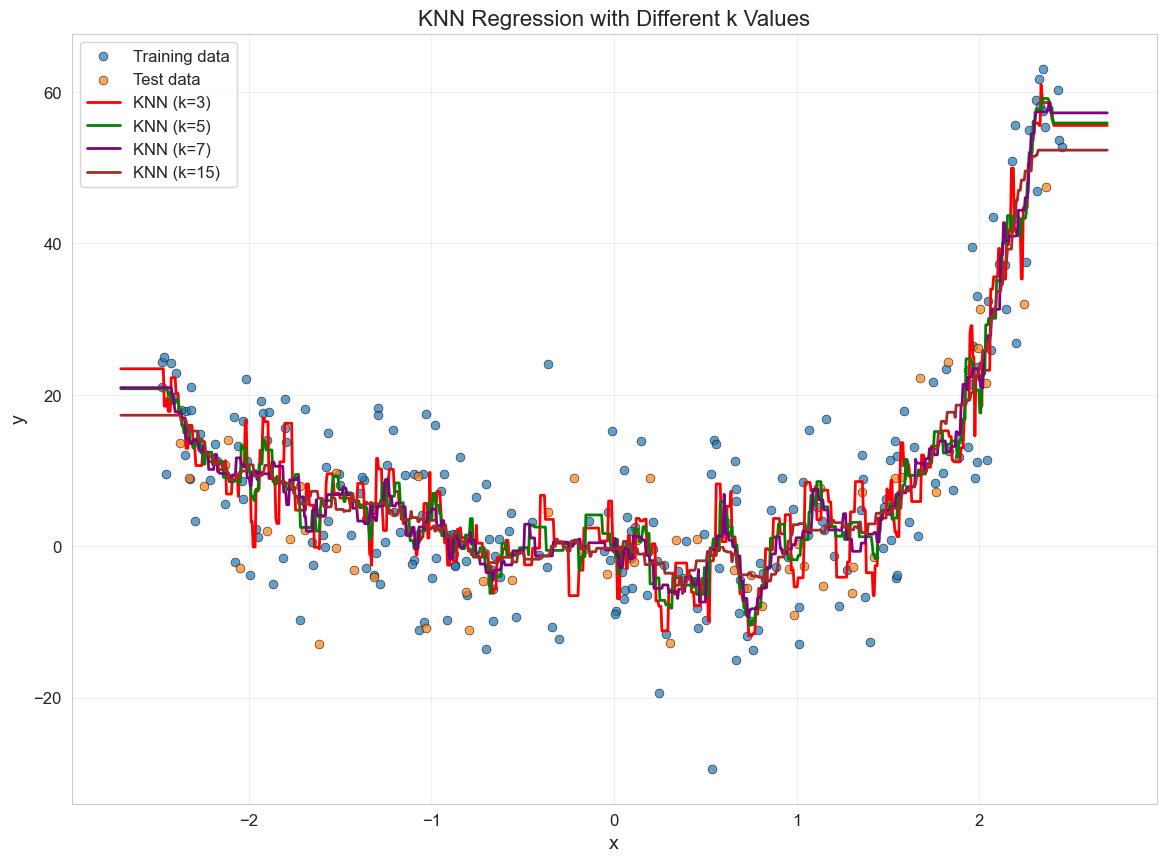

In [5]:
# Dictionary to store KNN models with different k values
knn_models = {}

# List of k values to test
k_values = [3, 5, 7, 15]

plt.figure(figsize=(14, 10))

# Plot data points
plt.scatter(X_train, y_train, alpha=0.7, s=40, c='#1f77b4', edgecolors='k', 
           linewidths=0.5, label='Training data')
plt.scatter(X_test, y_test, alpha=0.7, s=40, c='#ff7f0e', edgecolors='k', 
           linewidths=0.5, label='Test data')

# Colors for different k values
colors = ['red', 'green', 'purple', 'brown']

# Train and evaluate KNN regressors with different k values
for i, k in enumerate(k_values):
    # Train KNN regressor
    knn_reg = KNeighborsRegressor(n_neighbors=k)
    knn_reg.fit(X_train, y_train)
    
    # Store the model
    knn_models[k] = knn_reg
    
    # Calculate MSE
    y_train_pred = knn_reg.predict(X_train)
    y_test_pred = knn_reg.predict(X_test)
    
    train_mse.append(mean_squared_error(y_train, y_train_pred))
    test_mse.append(mean_squared_error(y_test, y_test_pred))
    regressors.append((knn_reg, None))
    
    # Plot predictions
    y_plot = knn_reg.predict(x_plot)
    plt.plot(x_plot, y_plot, color=colors[i], linewidth=2, label=f'KNN (k={k})')
    
    print(f"KNN Regressor with k={k}:")
    print(f"  Training MSE: {train_mse[-1]:.2f}")
    print(f"  Test MSE: {test_mse[-1]:.2f}")
    print()

plt.title('KNN Regression with Different k Values', fontsize=16)
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)
plt.show()

## 5. Polynomial Regression

Since we know the data has a polynomial pattern, let's try polynomial regression with different degrees.

c:\Users\kniko\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\kniko\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\kniko\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\kniko\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


Polynomial Regression (degree=2):
  Intercept: -4.9121
  Coefficient for x^1: 3.7744
  Coefficient for x^2: 6.2648
  Training MSE: 102.17
  Test MSE: 67.10

Polynomial Regression (degree=3):
  Intercept: -5.1942
  Coefficient for x^1: -4.0514
  Coefficient for x^2: 6.4070
  Coefficient for x^3: 2.0582
  Training MSE: 78.06
  Test MSE: 55.92

Polynomial Regression (degree=4):
  Intercept: -1.0522
  Coefficient for x^1: -4.7044
  Coefficient for x^2: 0.0739
  Coefficient for x^3: 2.2536
  Coefficient for x^4: 1.1708
  Training MSE: 66.82
  Test MSE: 42.97

Polynomial Regression (degree=5):
  Intercept: -1.0869
  Coefficient for x^1: -2.8673
  Coefficient for x^2: 0.0550
  Coefficient for x^3: 0.8634
  Coefficient for x^4: 1.1835
  Coefficient for x^5: 0.2024
  Training MSE: 66.25
  Test MSE: 44.31



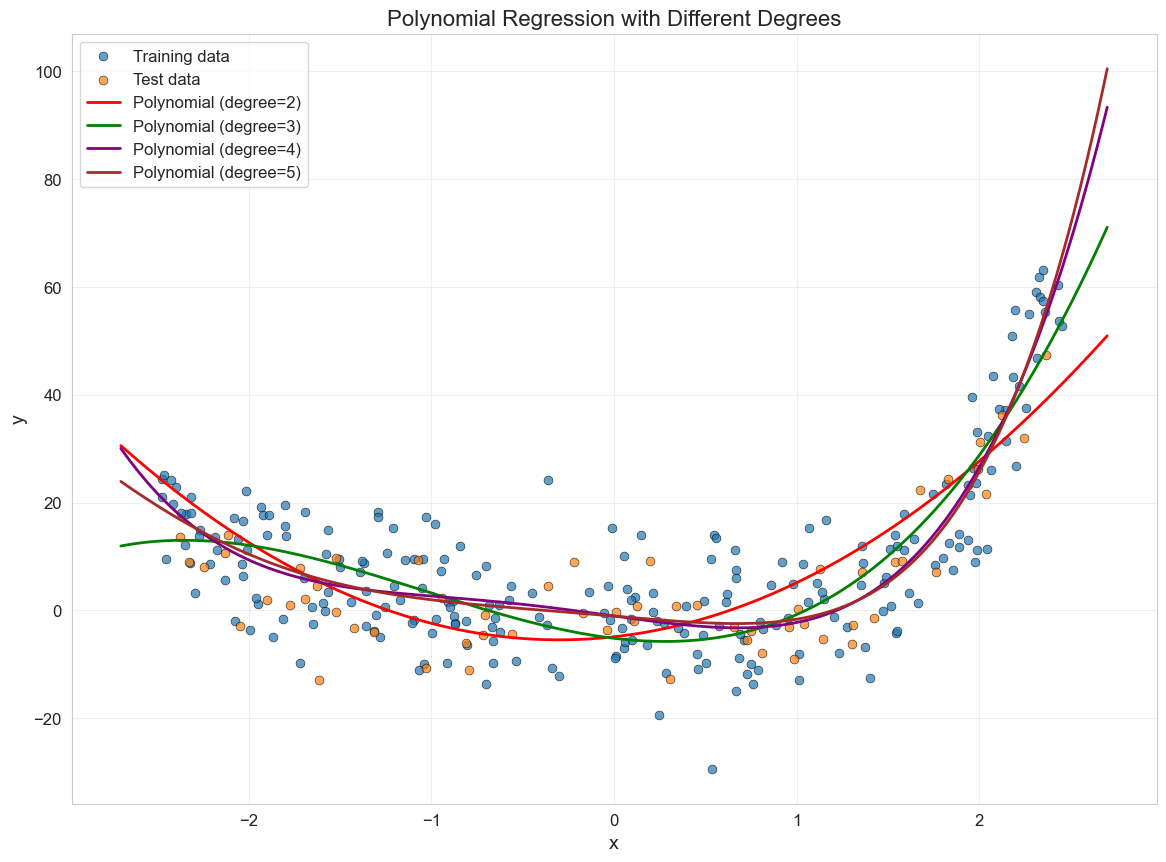

In [6]:
# Dictionary to store polynomial regression models
poly_models = {}

# List of degrees to test
degrees = [2, 3, 4, 5]

plt.figure(figsize=(14, 10))

# Plot data points
plt.scatter(X_train, y_train, alpha=0.7, s=40, c='#1f77b4', edgecolors='k', 
           linewidths=0.5, label='Training data')
plt.scatter(X_test, y_test, alpha=0.7, s=40, c='#ff7f0e', edgecolors='k', 
           linewidths=0.5, label='Test data')

# Colors for different degrees
colors = ['red', 'green', 'purple', 'brown']

# Train and evaluate polynomial regressors with different degrees
for i, degree in enumerate(degrees):
    # Create polynomial features
    poly_features = PolynomialFeatures(degree=degree, include_bias=True)
    X_poly_train = poly_features.fit_transform(X_train)
    X_poly_test = poly_features.transform(X_test)
    
    # Train linear regression on polynomial features
    poly_reg = LinearRegression()
    poly_reg.fit(X_poly_train, y_train)
    
    # Store the model
    poly_models[degree] = (poly_reg, poly_features)
    
    # Calculate MSE
    y_train_pred = poly_reg.predict(X_poly_train)
    y_test_pred = poly_reg.predict(X_poly_test)
    
    train_mse.append(mean_squared_error(y_train, y_train_pred))
    test_mse.append(mean_squared_error(y_test, y_test_pred))
    regressors.append((poly_reg, poly_features))
    
    # Generate predictions for plotting
    X_plot_poly = poly_features.transform(x_plot)
    y_plot = poly_reg.predict(X_plot_poly)
    
    # Plot predictions
    plt.plot(x_plot, y_plot, color=colors[i], linewidth=2, label=f'Polynomial (degree={degree})')
    
    # Print coefficients
    print(f"Polynomial Regression (degree={degree}):")
    print(f"  Intercept: {poly_reg.intercept_:.4f}")
    for j, coef in enumerate(poly_reg.coef_):
        if j > 0:  # Skip the intercept term which is already printed
            print(f"  Coefficient for x^{j}: {coef:.4f}")
    print(f"  Training MSE: {train_mse[-1]:.2f}")
    print(f"  Test MSE: {test_mse[-1]:.2f}")
    print()

plt.title('Polynomial Regression with Different Degrees', fontsize=16)
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)
plt.show()

## 6. Model Comparison and Evaluation

Now let's compare all models and evaluate their performance.

In [7]:
# Create a DataFrame with model performance metrics
model_names = [
    'Linear Regression',
    'KNN (k=3)',
    'KNN (k=5)',
    'KNN (k=7)',
    'KNN (k=15)',
    'Polynomial (degree=2)',
    'Polynomial (degree=3)',
    'Polynomial (degree=4)',
    'Polynomial (degree=5)'
]

mse_df = pd.DataFrame({
    'Model': model_names[:len(train_mse)],
    'Training MSE': train_mse,
    'Test MSE': test_mse
})

# Calculate the ratio of test/train MSE to detect overfitting
mse_df['Test/Train Ratio'] = mse_df['Test MSE'] / mse_df['Training MSE']

# Sort by test MSE
mse_df = mse_df.sort_values('Test MSE')

# Display results
mse_df.reset_index(drop=True)

,Model,Training MSE,Test MSE,Test/Train Ratio
0,Polynomial (degree=4),66.819201,42.972173,0.643111
1,Polynomial (degree=5),66.254908,44.308187,0.668753
2,KNN (k=7),59.765713,46.516777,0.778319
3,KNN (k=15),64.155736,47.764583,0.744510
4,KNN (k=5),55.731604,53.823809,0.965768
5,Polynomial (degree=3),78.063512,55.923934,0.716390
6,KNN (k=3),48.802318,60.412653,1.237905
7,Polynomial (degree=2),102.174923,67.097175,0.656689
8,Linear Regression,240.604027,148.426956,0.616893


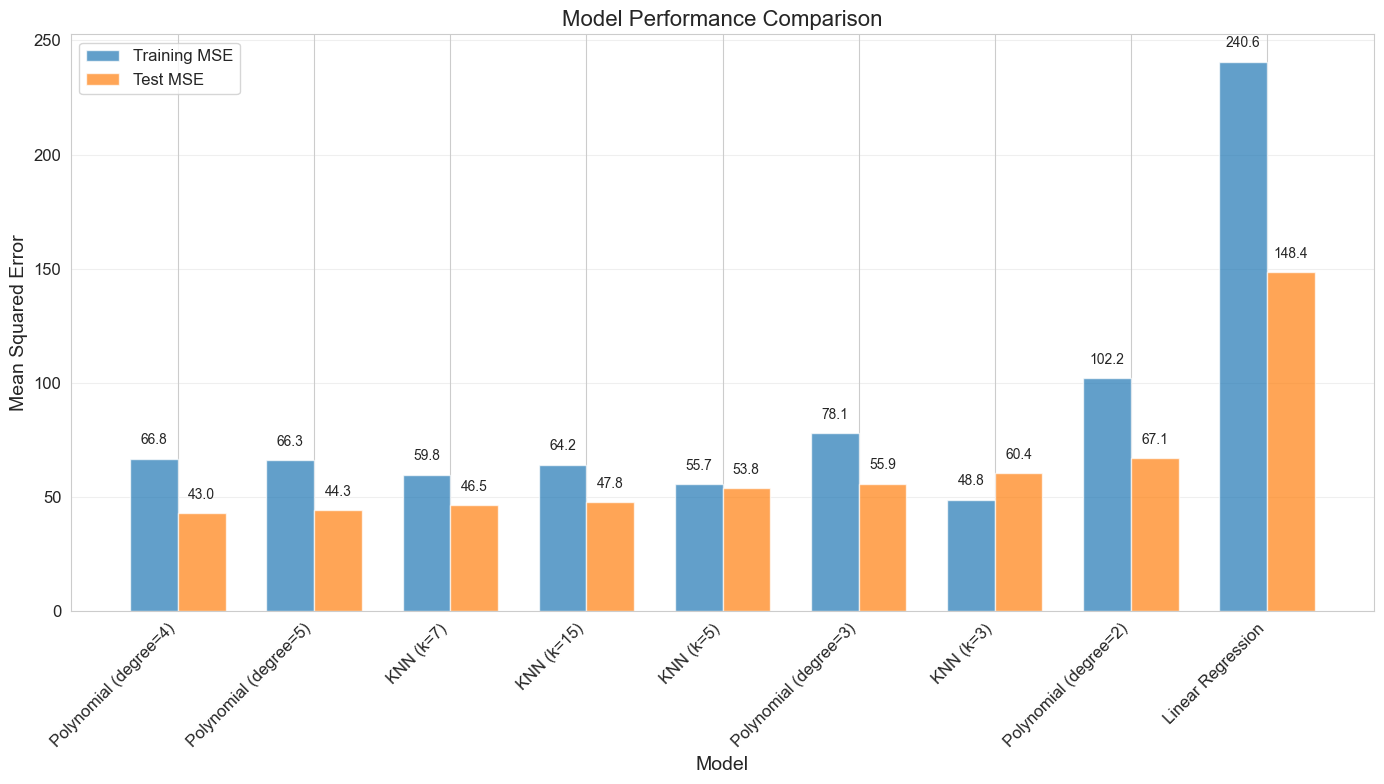

In [8]:
# Visualize model performance comparison
plt.figure(figsize=(14, 8))

x = np.arange(len(model_names[:len(train_mse)]))
width = 0.35

# Sort models by test MSE
sorted_indices = mse_df.index.tolist()
sorted_models = mse_df['Model'].tolist()
sorted_train_mse = mse_df['Training MSE'].tolist()
sorted_test_mse = mse_df['Test MSE'].tolist()

# Plot bars
plt.bar(x - width/2, sorted_train_mse, width, label='Training MSE', color='#1f77b4', alpha=0.7)
plt.bar(x + width/2, sorted_test_mse, width, label='Test MSE', color='#ff7f0e', alpha=0.7)

# Add labels and title
plt.xlabel('Model', fontsize=14)
plt.ylabel('Mean Squared Error', fontsize=14)
plt.title('Model Performance Comparison', fontsize=16)
plt.xticks(x, sorted_models, rotation=45, ha='right')
plt.legend(fontsize=12)

# Add value labels on bars
for i, v in enumerate(sorted_train_mse):
    plt.text(i - width/2, v + 5, f'{v:.1f}', ha='center', va='bottom', fontsize=10, rotation=0)
for i, v in enumerate(sorted_test_mse):
    plt.text(i + width/2, v + 5, f'{v:.1f}', ha='center', va='bottom', fontsize=10, rotation=0)

plt.tight_layout()
plt.grid(True, alpha=0.3, axis='y')
plt.show()

## 7. Best Model Visualization

Best Model: Polynomial (degree=4)
Training MSE: 66.82
Test MSE: 42.97


c:\Users\kniko\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


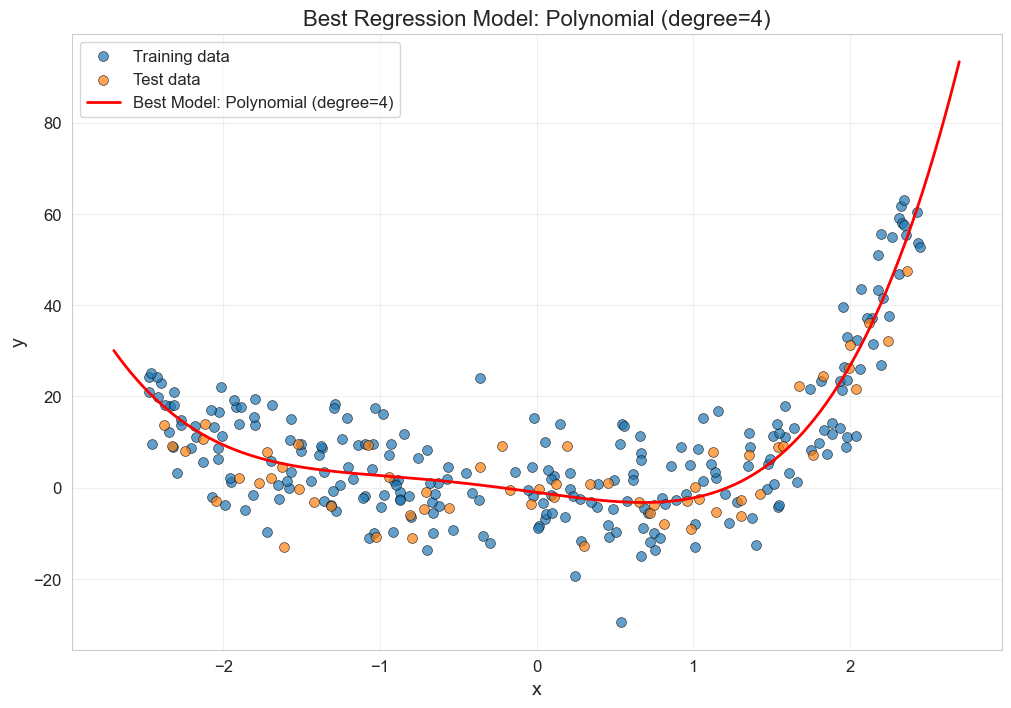

In [9]:
# Find the best model based on test MSE
best_model_idx = np.argmin(test_mse)
best_model_name = model_names[best_model_idx]
best_regressor, best_poly_features = regressors[best_model_idx]

print(f"Best Model: {best_model_name}")
print(f"Training MSE: {train_mse[best_model_idx]:.2f}")
print(f"Test MSE: {test_mse[best_model_idx]:.2f}")

# Visualize the best model
plt.figure(figsize=(12, 8))

# Plot original data
plt.scatter(X_train, y_train, alpha=0.7, s=50, c='#1f77b4', edgecolors='k', 
           linewidths=0.5, label='Training data')
plt.scatter(X_test, y_test, alpha=0.7, s=50, c='#ff7f0e', edgecolors='k', 
           linewidths=0.5, label='Test data')

# Plot best model predictions
if best_poly_features is not None:
    # Polynomial model
    X_plot_trans = best_poly_features.transform(x_plot)
else:
    # Linear or KNN model
    X_plot_trans = x_plot
    
y_plot = best_regressor.predict(X_plot_trans)
plt.plot(x_plot, y_plot, color='red', linewidth=2, label=f'Best Model: {best_model_name}')

plt.title(f'Best Regression Model: {best_model_name}', fontsize=16)
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)
plt.show()

## 8. Save Models and Results

In [10]:
# Save MSE results
mse_df.to_csv('data/regression_model_comparison.csv', index=False)
mse_df.to_pickle('data/regression_mse_results.pkl')

# Save all models
with open('data/regression_models.pkl', 'wb') as f:
    pickle.dump(regressors, f)
    
# Save best model separately
best_model = {
    'name': best_model_name,
    'regressor': best_regressor,
    'poly_features': best_poly_features,
    'train_mse': train_mse[best_model_idx],
    'test_mse': test_mse[best_model_idx]
}

with open('data/best_regression_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)
    
print("Models and results saved successfully!")

Models and results saved successfully!


## 9. Conclusion

In this project, we compared several regression models on polynomial data:

1. **Linear Regression** - As expected, this model performed poorly due to its inability to capture non-linear patterns in the data.

2. **K-Nearest Neighbors** - KNN models showed varying performance based on the number of neighbors (k). With smaller k values, the model may overfit to the training data but capture local patterns better.

3. **Polynomial Regression** - These models generally performed the best since they match the underlying data generation process. The degree-4 polynomial model likely performed best since our data was generated with a 4th-degree polynomial function.

### Key Insights:

- Model selection should be based on the understanding of the underlying data patterns
- Polynomial regression excels when the data follows a polynomial pattern
- Higher-degree polynomials risk overfitting, especially when the degree exceeds the true underlying pattern
- KNN provides a flexible non-parametric approach but requires careful tuning of the k parameter
- The gap between training and test MSE helps identify overfitting

### Next Steps:

- Implement regularization techniques (Ridge, Lasso) to prevent overfitting in polynomial models
- Explore more advanced regression methods like SVR (Support Vector Regression) or Decision Tree-based models
- Implement cross-validation for more robust model evaluation
- Apply feature scaling to improve model performance